# Andrew Ng's Machine Learning Exercise 1a: Univariate linear regression

In [1]:
from __future__ import division

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
%matplotlib inline 

In [4]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# 2 Linear regression with one variable

Load the dataset.

In [5]:
data = np.loadtxt('ex1_orig_octave/ex1data1.txt', delimiter=',')

In [6]:
x = data[:, 0] 
y = data[:, 1]

M = len(y) 

## 2.1 Plotting the data.

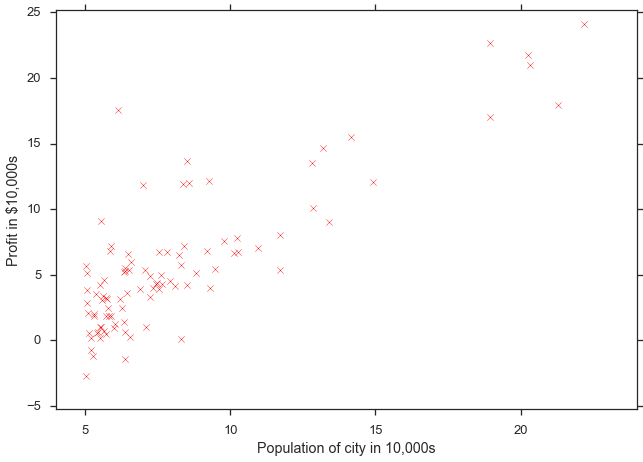

In [7]:
plt.figure()
plt.scatter(x, y, c='r', marker='x', s=40)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4, 24)
plt.ylim(-5.2, 25.2)
plt.savefig('ex1a_univariate_plots/fig_1.png', dpi=300) 

## 2.2 Gradient descent

Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.

In [8]:
X = np.vstack((np.ones(M), x)).T

Inialize each of the two model parameters to zero. 

In [9]:
theta_0 = np.zeros(2)

Define the cost function for linear regression.

In [10]:
def compute_cost(X, y, M, theta):
    """Python version of computeCost.m."""
    return 1 / 2 / M * np.sum((theta.dot(X.T) - y)**2)

Test it.

In [11]:
print 'Initial cost: %.3f' % compute_cost(X, y, M, theta_0)

Initial cost: 32.073


Define hyperparameters for batch gradient descent.

In [12]:
num_iters = 1500
alpha = 0.01

Implement the gradient descent algorithm.

In [13]:
def gradient_descent(X, y, M, theta_0, alpha, num_iters):
    """Python version of gradientDescent.m."""
    J_history = np.zeros(num_iters)
    theta = theta_0.copy()
    for i in xrange(num_iters):
        J_history[i] = compute_cost(X, y, M, theta)
        theta -= alpha / M * (theta.dot(X.T) - y).dot(X)
        
    return theta, J_history

Test it.

In [14]:
theta, J_history = gradient_descent(X, y, M, theta_0, alpha, num_iters)

In [15]:
print "Theta found by gradient descent: %.3f, %.3f" % (theta[0], theta[1])

Theta found by gradient descent: -3.630, 1.166


Plot cost vs. steps.

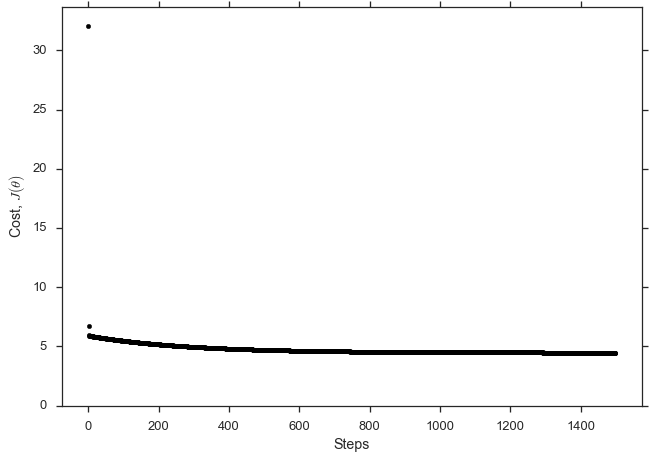

In [16]:
plt.figure()
plt.scatter(np.arange(num_iters), J_history, c='k', marker='o')
plt.xlabel('Steps')
plt.ylabel('Cost, ' + r'$J(\theta)$')
plt.xlim(-num_iters * 0.05, num_iters * 1.05)
plt.ylim(0, max(J_history) * 1.05)
plt.savefig('ex1a_univariate_plots/cost_vs_steps.png', dpi=300)

Define a function that returns the model prediction for profit given the population level and model parameters.

In [17]:
def prediction(theta, population):
    return theta[0] + population * theta[1]

Compare training data with linear regression predictions.

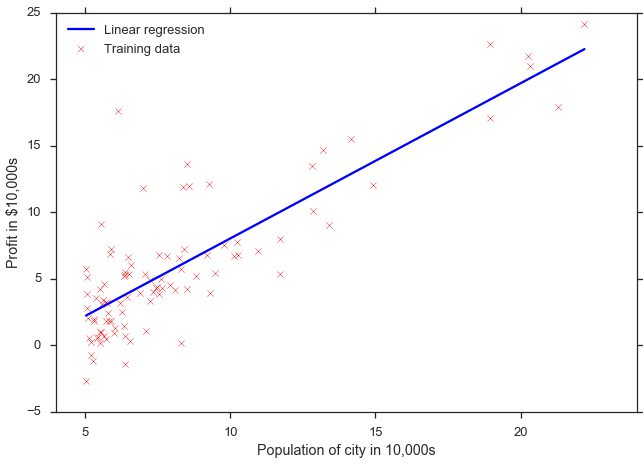

In [18]:
plt.figure()
plt.scatter(x, y, c='r', marker='x', s=40, label='Training data')
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, prediction(theta, x_range), 'b-', label='Linear regression')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4, 24)
plt.ylim(-5, 25)
plt.legend(numpoints=1, loc=0)
plt.savefig('ex1a_univariate_plots/fig_2.png', dpi=300) 

Extrapolate.

In [19]:
population = 3.5
print 'For population = %d, we predict a profit of %0.2f.' \
    % (population * 1e4, prediction(theta, population) * 1e4)

population = 7.0
print 'For population = %d, we predict a profit of %0.2f.' \
    % (population * 1e4, prediction(theta, population) * 1e4)

For population = 35000, we predict a profit of 4519.77.
For population = 70000, we predict a profit of 45342.45.


## 2.4 Visualizing the cost function

In [20]:
num_pts = 50
theta_0_low, theta_0_high = -10, 10
theta_1_low, theta_1_high = -1, 4

theta_0_pts = np.linspace(theta_0_low, theta_0_high, num_pts)
theta_1_pts = np.linspace(theta_1_low, theta_1_high, num_pts)
theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_pts, theta_1_pts)

cost_mesh = np.array([compute_cost(X, y, M, np.array([theta_0, theta_1])) for theta_0, theta_1 \
                      in zip(theta_0_mesh.ravel(), theta_1_mesh.ravel())]).reshape(theta_0_mesh.shape)

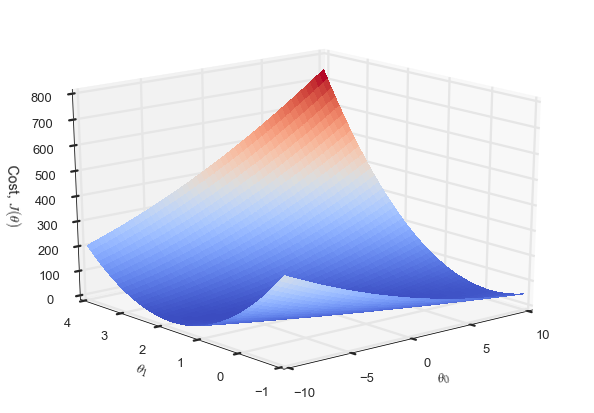

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_mesh, 
                rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$', labelpad=15)
ax.set_ylabel(r'$\theta_1$', labelpad=15)
ax.set_zlabel('Cost, ' + r'$J(\theta)$', labelpad=15)
ax.set_xlim(theta_0_low, theta_0_high)
ax.set_ylim(theta_1_low, theta_1_high)
ax.set_zlim(0, 800)
ax.view_init(elev=20., azim=230)
plt.savefig('ex1a_univariate_plots/fig_3a.png', dpi=300)

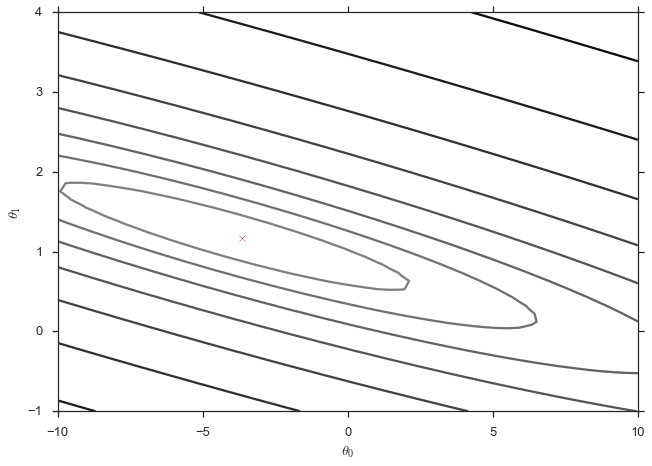

In [22]:
plt.figure()
plt.contour(theta_0_mesh, theta_1_mesh, np.log10(cost_mesh), np.linspace(-2, 3, 20))
plt.scatter(theta[0], theta[1], c='r', marker='x', s=40)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.xlim(theta_0_low, theta_0_high)
plt.ylim(theta_1_low, theta_1_high)
plt.savefig('ex1a_univariate_plots/fig_3b.png', dpi=300) 

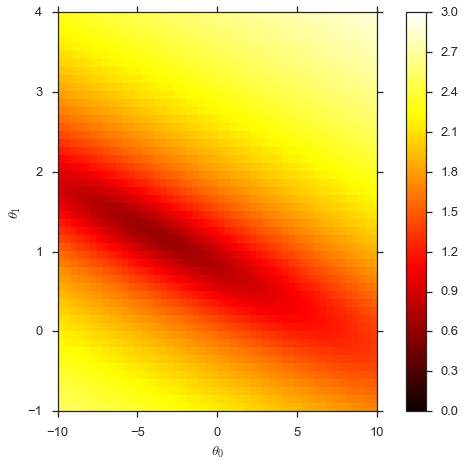

In [23]:
plt.figure()
plt.imshow(np.log10(cost_mesh), extent=[theta_0_low, theta_0_high, theta_1_low, theta_1_high], aspect=5, 
           vmin=0, vmax=3, cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.colorbar()
plt.savefig('ex1a_univariate_plots/fig_3_heatmap.png', dpi=300) 